In [1]:
import os
import matplotlib.pyplot as plt
import sys
from pathlib import Path

root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
qm9_path = root / 'data' / 'QM9' / 'dsgdb9nsd.xyz'
qm9_edit_dir = root / 'data' / 'QM9_edit'
qm9_csv_path = qm9_edit_dir / 'QM9_edit.csv'

os.chdir(root)

from src.data.preprocess import process_qm9_directory, load_data, visualize_histogram, outlier_detection, visualize_outliers_boxplot, visualize_outliers_histograms

## QM9

### Create .csv

In [2]:
# process_qm9_directory(input_dir=qm9_path, output_csv=qm9_csv_path)

### Data Exploration

In [3]:
qm9_df = load_data(qm9_csv_path)

qm9_df.info()
display(qm9_df.head())
display(qm9_df.describe())

# Check for missing values
print("QM9 missing values: " + str(qm9_df.isnull().sum().sum()))

# Check for duplicate values
duplicates = qm9_df.duplicated().sum()
print("QM9 duplicate values: " + str(duplicates))

Loaded 133885 molecules
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133885 entries, 0 to 133884
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SMILES         133885 non-null  object 
 1   Dipole_moment  133885 non-null  float64
 2   U              133885 non-null  float64
 3   H              133885 non-null  float64
 4   G              133885 non-null  float64
 5   Cv             133885 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.1+ MB


,SMILES,Dipole_moment,U,H,G,Cv
0,C,0.0000,-40.476062,-40.475117,-40.498597,6.469
1,N,1.6256,-56.523026,-56.522082,-56.544961,6.316
2,O,1.8511,-76.401867,-76.400922,-76.422349,6.002
3,C#C,0.0000,-77.305527,-77.304583,-77.327429,8.574
4,C#N,2.8937,-93.409370,-93.408425,-93.431246,6.278


,Dipole_moment,U,H,G,Cv
count,133885.000000,133885.000000,133885.000000,133885.000000,133885.000000
mean,2.706037,-411.535513,-411.534569,-411.577397,31.600676
std,1.530394,40.060012,40.060012,40.060741,4.062471
min,0.000000,-714.560153,-714.559209,-714.602138,6.002000
25%,1.588700,-437.905942,-437.904997,-437.947682,28.942000
50%,2.500000,-417.857351,-417.856407,-417.895731,31.555000
75%,3.636100,-387.039746,-387.038802,-387.083279,34.276000
max,29.556400,-40.476062,-40.475117,-40.498597,46.969000


QM9 missing values: 0
QM9 duplicate values: 0


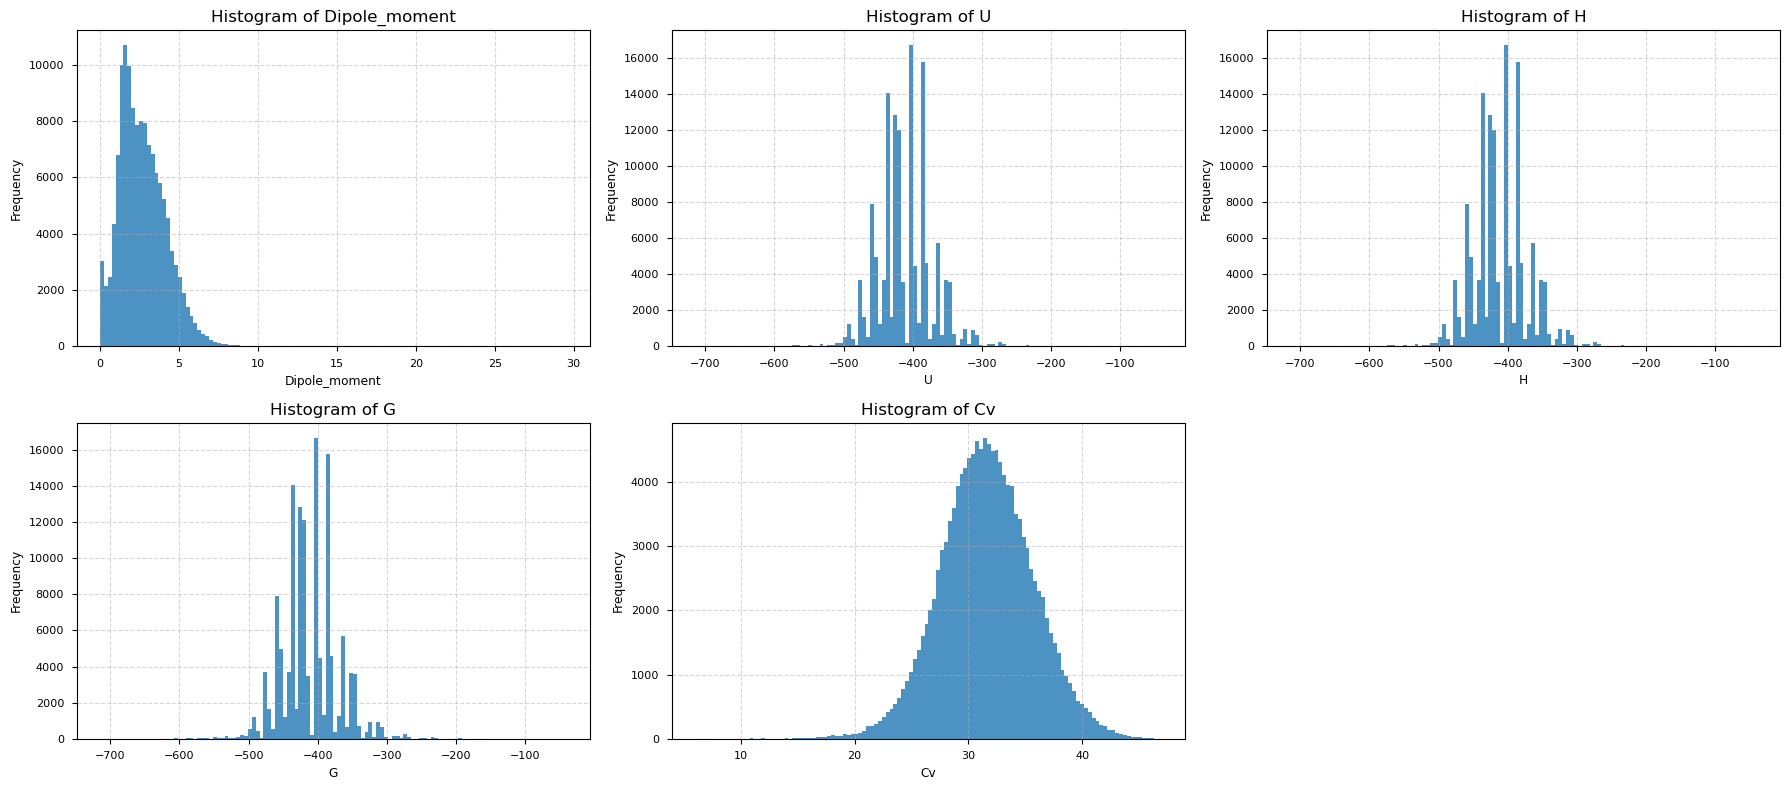

In [4]:
# qm9_df.hist(bins=120, figsize=(20, 20), layout=(5, 3))
# plt.style.use('seaborn-v0_8-paper')  
# plt.show()

visualize_histogram(qm9_df, bins=120)

Column Dipole_moment has 1413 outliers. Lower cuttof: -1.482. Upper cutoff: 6.707
Column U has 2495 outliers. Lower cuttof: -514.205. Upper cutoff: -310.740
Column H has 2495 outliers. Lower cuttof: -514.204. Upper cutoff: -310.740
Column G has 2496 outliers. Lower cuttof: -514.244. Upper cutoff: -310.787
Column Cv has 1461 outliers. Lower cuttof: 20.941. Upper cutoff: 42.277


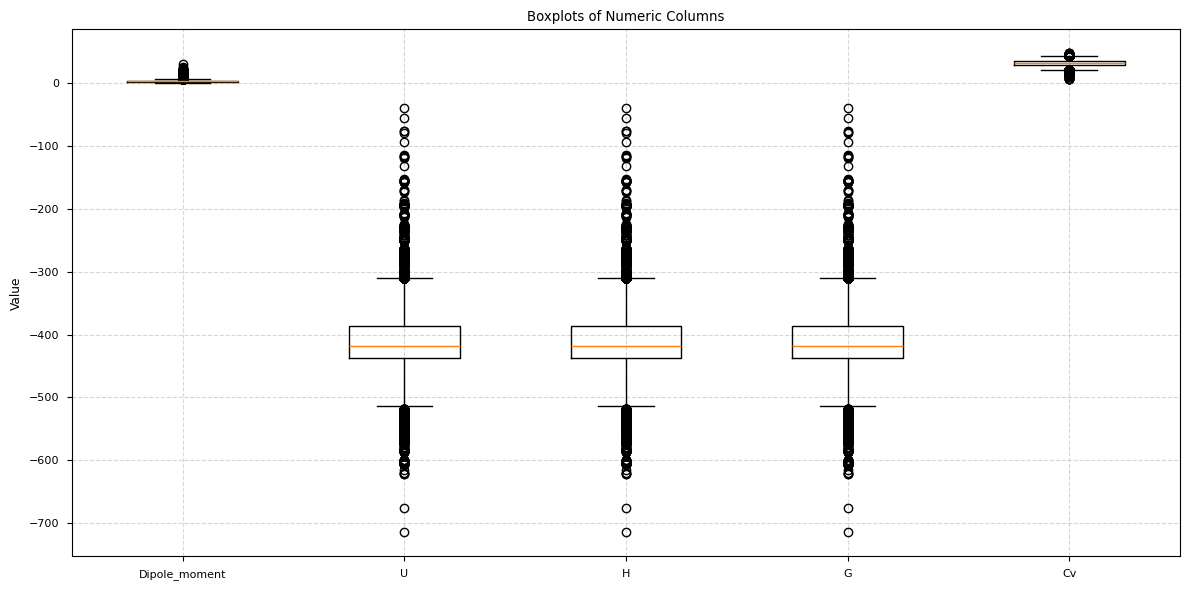

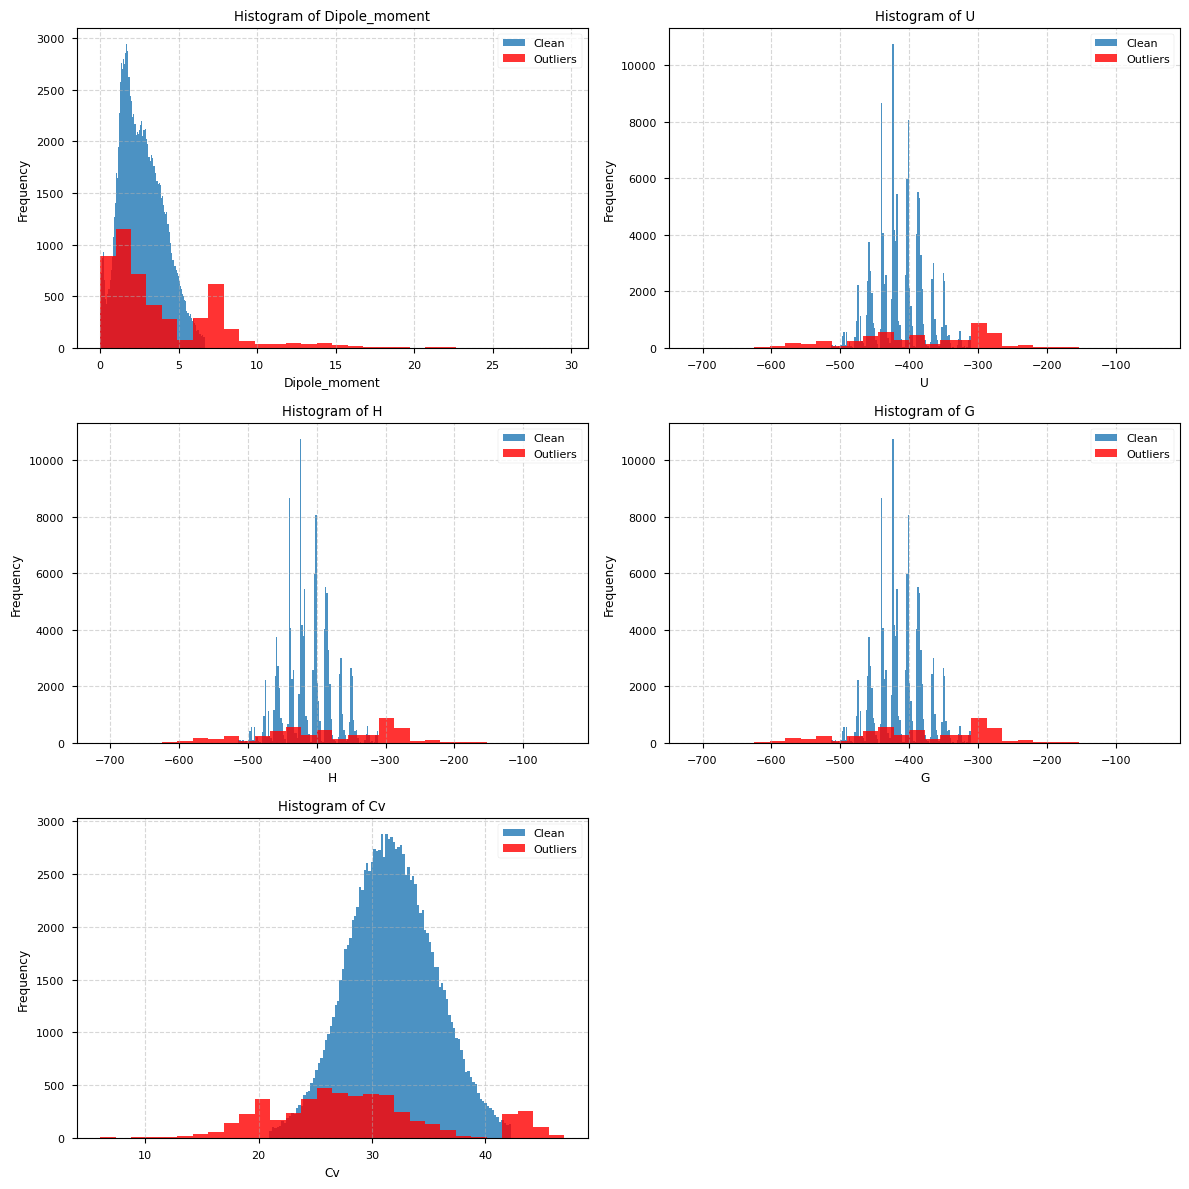

In [5]:
df_clean, df_outliers = outlier_detection(qm9_df)
visualize_outliers_boxplot(qm9_df)
visualize_outliers_histograms(df_clean, df_outliers)

Outliers are correct